In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

import tensorflow as tf

np.random.seed(1)

2023-01-01 11:39:03.579406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-01 11:39:04.558051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-01 11:39:04.558108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-01 11:39:04.637299: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-01 11:39:05.993013: W tensorflow/stream_executor/platform/de

In [2]:
# read data
df = pd.read_csv('../../data/education_census_data.csv')
df.describe()

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,PREDICTOR RAT AGE AT LATEST ARREST_20-30,PREDICTOR RAT AGE AT LATEST ARREST_30-40,...,PREDICTOR RAT AGE AT LATEST ARREST_70-80,PREDICTOR RAT AGE AT LATEST ARREST_less than 20,less_or_8th_grade,less_or_12th_grade,highschool or equivalent,some college,associate,bachelor,master or higher,Education_Rate
count,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,...,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000
mean,0.722957,0.032573,0.056357,0.156005,0.258463,0.481784,-0.067300,0.047297,0.342930,0.209338,...,0.002225,0.185160,218.262117,279.217295,626.655444,476.675351,136.091776,430.276136,297.809917,63.561705
std,0.447539,0.193414,0.262757,0.468660,0.437790,1.005172,0.447049,0.228805,0.474689,0.406837,...,0.047116,0.388428,265.093260,199.791124,370.757798,292.800129,98.838952,611.950721,580.763598,10.206084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,10.880503
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,53.000000,138.000000,336.000000,258.000000,62.000000,105.000000,39.000000,55.876818
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,118.000000,243.000000,551.000000,424.000000,116.000000,206.000000,89.000000,62.958115
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.000000,1.000000,0.000000,...,0.000000,0.000000,271.000000,386.000000,922.000000,620.000000,184.000000,479.000000,284.000000,70.016681
max,1.000000,4.000000,10.000000,12.000000,1.000000,27.000000,7.300000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1734.000000,2427.000000,1857.000000,2031.000000,885.000000,4711.000000,5186.000000,91.808346


In [3]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

# Neural Network

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2023-01-01 11:39:07.918248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-01 11:39:07.918727: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-01 11:39:07.919076: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-NCRIRMG): /proc/driver/nvidia/version does not exist
2023-01-01 11:39:07.921424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-106.57803 , -132.94667 , -238.71805 ,  115.53724 ,  -51.84703 ,
         172.11044 ,  106.955246,   19.677628,  -98.92605 , -105.42151 ]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.6950676e-25,
        0.0000000e+00, 1.0000000e+00, 5.0519309e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

305.05713

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
5247/5247 [==============================] - 17s 3ms/step - loss: 3.1095 - accuracy: 0.7159
Epoch 2/5
5247/5247 [==============================] - 16s 3ms/step - loss: 0.2324 - accuracy: 0.9080
Epoch 3/5
5247/5247 [==============================] - 14s 3ms/step - loss: 0.1777 - accuracy: 0.9269
Epoch 4/5
5247/5247 [==============================] - 14s 3ms/step - loss: 0.1536 - accuracy: 0.9455
Epoch 5/5
5247/5247 [==============================] - 14s 3ms/step - loss: 0.1350 - accuracy: 0.9526


In [12]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1749/1749 [==============================] - 3s 2ms/step


In [13]:
print(y_test.shape, y_pred.shape)

(55960,) (55960,)


Text(0.5, 427.9555555555555, 'Predicted label')

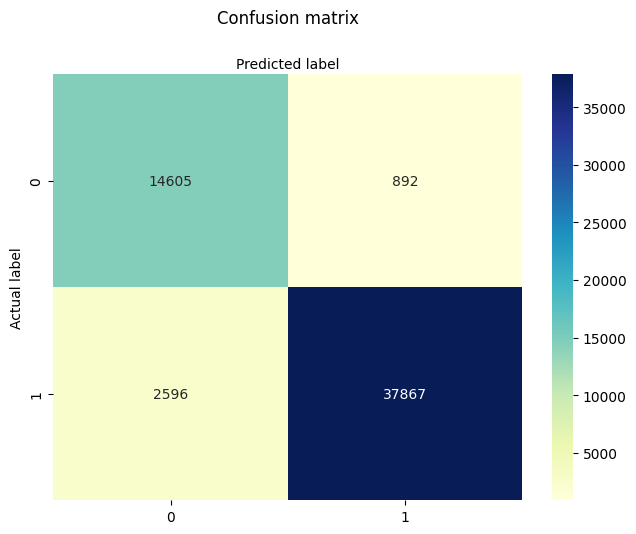

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.85      0.94      0.89     15497
HIGH SSL SCORE       0.98      0.94      0.96     40463

      accuracy                           0.94     55960
     macro avg       0.91      0.94      0.92     55960
  weighted avg       0.94      0.94      0.94     55960



In [16]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9377
Precision: 0.9770
Recall: 0.9358
F1 Score: 0.9560
